In [26]:
import keras
from keras.models import Sequential
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization,Dense
from keras.utils import to_categorical

import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tqdm import tqdm
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rn

In [2]:
os.listdir('./flowers-recognition/flowers')

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [3]:
x=[]
y=[]
img_size=150

flowers_daisy_dir = './flowers-recognition/flowers/daisy'
flowers_dandelion_dir = './flowers-recognition/flowers/dandelion'
flowers_rose_dir = './flowers-recognition/flowers/rose'
flowers_sunflower_dir= './flowers-recognition/flowers/sunflower'
flowers_tulip_dir='./flowers-recognition/flowers/tulip'

In [4]:
def label_assignment(img,flower_type):
    return flower_type

In [5]:
def make_label(flower_type,directory):
    for img in tqdm(os.listdir(directory)):
        label=label_assignment(img,flower_type)
        path=os.path.join(directory,img)
        img=cv2.imread(path,cv2.IMREAD_COLOR)
        img=cv2.resize(img,(img_size,img_size))
        
        x.append(np.array(img))
        y.append(str(label))
        

In [6]:
make_label('Daisy',flowers_daisy_dir)

100%|████████████████████████████████████████████████████████████████████████████████| 769/769 [00:24<00:00, 38.75it/s]


In [7]:
make_label('Dandelion',flowers_dandelion_dir)

100%|█████████████████████████████████████████████████████████████████████████████▋| 1051/1055 [00:31<00:00, 34.10it/s]

error: OpenCV(4.1.0) C:\projects\opencv-python\opencv\modules\imgproc\src\resize.cpp:3718: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [8]:
make_label('Rose',flowers_rose_dir)


 41%|████████████████████████████████▌                                               | 319/784 [00:08<00:12, 36.27it/s]


 97%|█████████████████████████████████████████████████████████████████████████████▎  | 758/784 [00:17<00:00, 34.28it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 784/784 [00:18<00:00, 39.75it/s]

In [9]:
make_label('Sunflower',flowers_sunflower_dir)


 43%|██████████████████████████████████                                              | 313/734 [00:09<00:11, 36.62it/s]


 91%|█████████████████████████████████████████████████████████████████████████       | 670/734 [00:17<00:01, 34.13it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 734/734 [00:19<00:00, 37.43it/s]

In [10]:
make_label('Tulip',flowers_tulip_dir)


 37%|█████████████████████████████▊                                                  | 366/984 [00:08<00:12, 49.04it/s]


 76%|████████████████████████████████████████████████████████████▍                   | 744/984 [00:17<00:05, 42.65it/s]


100%|████████████████████████████████████████████████████████████████████████████████| 984/984 [00:23<00:00, 42.61it/s]

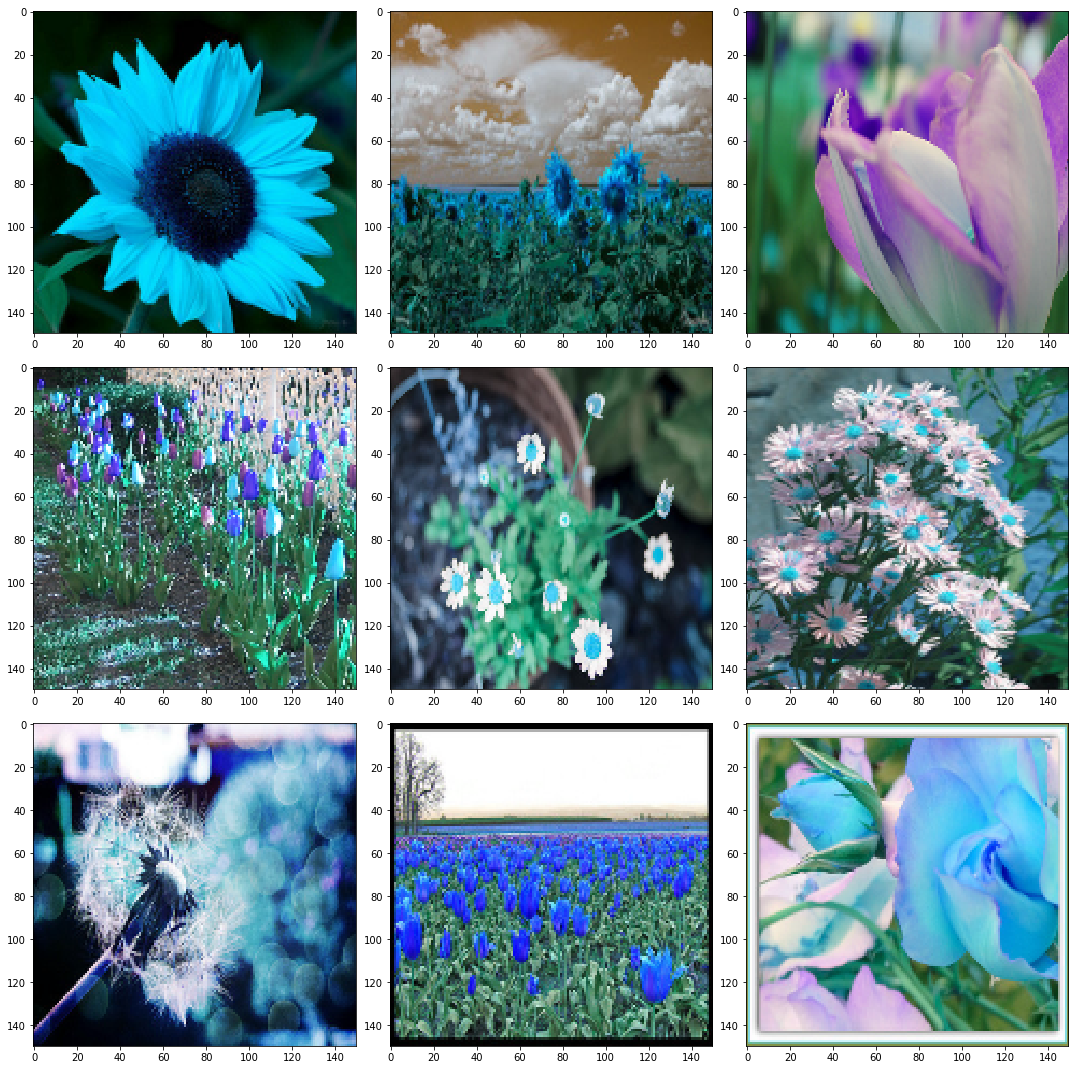

In [11]:
fig,ax=plt.subplots(3,3)
fig.set_size_inches(15,15)

for i in range(3):
    for j in range(3):
        l=rn.randint(0,len(y))
        ax[i,j].imshow(x[l])
        
plt.tight_layout()

In [12]:
le=LabelEncoder()

In [13]:
y=le.fit_transform(y)


In [14]:
y

array([0, 0, 0, ..., 4, 4, 4], dtype=int64)

In [15]:
categorical_y=to_categorical(y,5)

In [16]:
categorical_y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [17]:
X=np.array(x)

In [20]:
X=X.astype('float32')

X=X/255.0

In [22]:
x_train,y_train,x_test,y_test=train_test_split(X,categorical_y,test_size=0.2)

In [38]:
x_train.shape

(3458, 150, 150, 3)

In [33]:
model=Sequential()

In [34]:
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(150,150,3)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(96,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(96,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(5,activation='softmax'))


In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [36]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 150, 150, 32)      896       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 150, 150, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 75, 75, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 37, 37, 96)        55392     
__________

In [39]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=128,epochs=15)

ValueError: Error when checking target: expected dense_4 to have 2 dimensions, but got array with shape (865, 150, 150, 3)